In [1]:
import os
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from os import getcwd
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation = 'relu', input_shape = (128, 128, 3)),
    tf.keras.layers.AveragePooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.AveragePooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

model.compile(optimizer=RMSprop(lr=0.001), loss='categorical_crossentropy', metrics=['acc'])

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 16)      448       
_________________________________________________________________
average_pooling2d (AveragePo (None, 63, 63, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 32)        4640      
_________________________________________________________________
average_pooling2d_1 (Average (None, 30, 30, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28800)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               14746112  
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 1

In [22]:
TRAINING_DIR = r"/Users/claudiamichael/Documents/rgb/training"
train_datagen = ImageDataGenerator(
    
    fill_mode = 'nearest')

train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size = (128, 128),
    batch_size = 6,
    )

VALIDATION_DIR = r"/Users/claudiamichael/Documents/rgb/testing"
validation_datagen = ImageDataGenerator(rescale = 1./255)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size = (128, 128),
    batch_size = 6,
    )

Found 27 images belonging to 3 classes.
Found 9 images belonging to 3 classes.


In [23]:
history = model.fit_generator(train_generator,
                              epochs=50,
                              verbose=1,
                              validation_data=validation_generator)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 5 steps, validate for 2 steps
Epoch 1/50
5/5 [==============================] - 3s 558ms/step - loss: 3318.7522 - acc: 0.4074 - val_loss: 0.1193 - val_acc: 1.0000
Epoch 2/50
5/5 [==============================] - 2s 324ms/step - loss: 2.0929 - acc: 0.9259 - val_loss: 0.3558 - val_acc: 0.7778
Epoch 3/50
5/5 [==============================] - 2s 307ms/step - loss: 125.2236 - acc: 0.7037 - val_loss: 0.3659 - val_acc: 0.7778
Epoch 4/50
5/5 [==============================] - 1s 294ms/step - loss: 25.0045 - acc: 0.8889 - val_loss: 0.0934 - val_acc: 0.8889
Epoch 5/50
5/5 [==============================] - 1s 292ms/step - loss: 11.5684 - acc: 0.9630 - val_loss: 0.1115 - val_acc: 1.0000
Epoch 6/50
5/5 [==============================] - 2s 332ms/step - loss: 4.3505e-06 - acc: 1.0000 - val_loss: 0.1112 - val_acc: 1.0000
Epoch 7/50
5/5 [===========================

Text(0.5, 1.0, 'Training and validation loss')

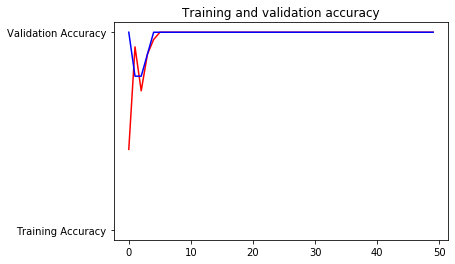

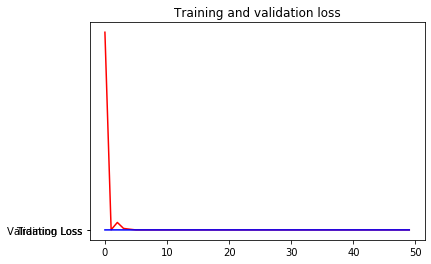

In [24]:
# PLOT LOSS AND ACCURACY
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) 

plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

In [25]:
model.evaluate(validation_generator, verbose=1)

  ...
    to  
  ['...']
2/2 [==============================] - 0s 28ms/step - loss: 0.1077 - acc: 1.0000


[0.10774705000221729, 1.0]

In [71]:
img = cv2.imread(r"/Users/claudiamichael/Documents/test/test_in/test_img.jpg")
#cv2.imshow('blue image',img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()
resize = cv2.resize(img,(128,128), interpolation = cv2.INTER_AREA)
if os.path.isfile(r"/Users/claudiamichael/Documents/test/result/Blue/new_img.jpg"):
    None
else:    
    root_dir = r"/Users/claudiamichael/Documents/test"
    parent_dir = "result"
    sub_parent_dir = "Blue"
    path1 = os.path.join(root_dir, parent_dir)
    os.mkdir(path1)
    path2 = os.path.join(path1, sub_parent_dir)
    os.mkdir(path2)
cv2.imwrite(r"/Users/claudiamichael/Documents/test/result/Blue/new_img.jpg", resize)
cv2.waitKey(0)

-1

In [73]:
TRAINING_DIR =  r"/Users/claudiamichael/Documents/test/result"
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest')

train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size = (128, 128),
   )
print(train_generator)

Found 1 images belonging to 1 classes.


In [74]:
prediction = model.predict(train_generator)
print(prediction)

[[9.9983454e-01 1.6548307e-04 1.6553181e-10]]


Blue


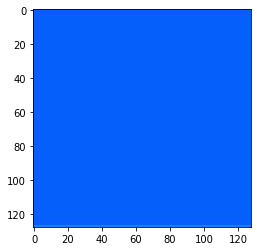

In [75]:
if prediction[0][0] > 0.8:
    print('Blue')
elif prediction[0][1] > 0.8:
    print('Green')
elif prediction[0][2] > 0.8:
    print('Red')
img_new = mpimg.imread(r"/Users/claudiamichael/Documents/test/result/Blue/new_img.jpg")
pic = plt.imshow(img_new)